In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()
from sklearn.linear_model import LinearRegression

In [2]:
ad_sale_data = pd.read_excel('advertising_sales_data.xlsx',index_col='Campaign')

In [4]:
ad_sale_data.head()

,TV,Radio,Newspaper,Sales
Campaign,,,,
camp1,230.1,37.8,69.2,22.1
camp2,44.5,39.3,45.1,10.4
camp3,17.2,45.9,69.3,12.0
camp4,151.5,41.3,58.5,16.5
camp5,180.8,10.8,58.4,17.9


In [5]:
ad_sale_data.isnull().sum()

TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64

# **Q1**

In [6]:
ad_sale_data.TV.mean()

147.0425

Average amount spent on TV advertisement is $147.0425  

# **Q2**  drawing out the corelation by building and examining regression line on a scatter plot

<AxesSubplot: title={'center': 'Radio vs Sales'}, xlabel='Radio', ylabel='Sales'>

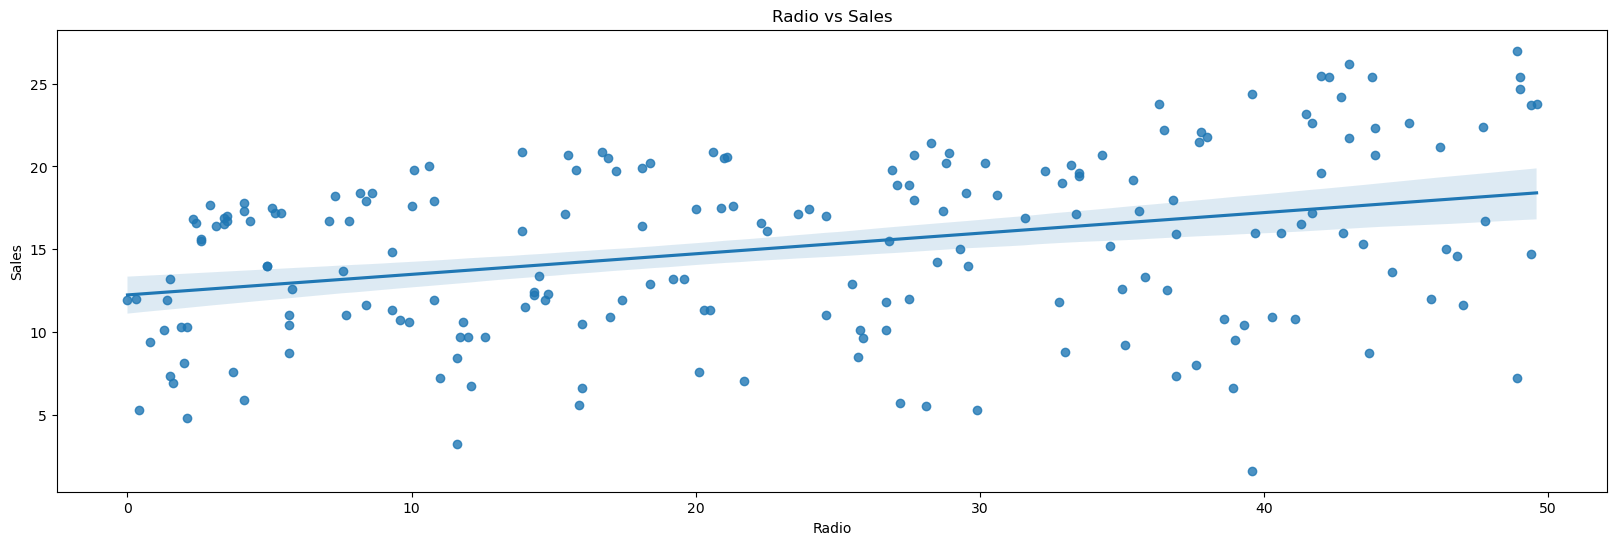

In [7]:
plt.figure(figsize=(20,6))
plt.title('Radio vs Sales')
sns.regplot(x='Radio',y='Sales',data = ad_sale_data)

There is a weak correlation between 'Radio' and 'Sales' as there is a visible flat regression line however we can say there is a week positive correlation between 'Radio' and 'Sales'

# **Q3.** 
Measuring how much variance in sales data can be explained by Radio,TV,Newspaper using the score function of LinearRegressionModel which returns the R^2 coefficent whoose value is between 1 and 0 .Score of  1 means that the feature can complelety explain the variance and score of 0 means that the target variable is not dependent on the feature 

In [41]:
radio_avg = ad_sale_data.Radio.mean()
model = LinearRegression().fit(ad_sale_data[['Radio']].fillna(radio_avg),ad_sale_data['Sales'])
print("score is:",model.score(ad_sale_data[['Radio']].fillna(radio_avg),ad_sale_data['Sales']))

score is: 0.1222556420317018


Thereby we can say that radio  explains the 12% of the variance in sales 

In [42]:
model = LinearRegression().fit(ad_sale_data[['TV']],ad_sale_data['Sales'])
print('score is:',model.score(ad_sale_data[['TV']],ad_sale_data['Sales']))

score is: 0.8121757029987414


Thereby we can say that TV  explains the 81% of the variance in sales

In [43]:
model = LinearRegression().fit(ad_sale_data[['Newspaper']],ad_sale_data['Sales'])
print('score is:',model.score(ad_sale_data[['Newspaper']],ad_sale_data['Sales']))

score is: 0.024951369862864836


Thereby we can say that Newspaper  explains only 2% of the variance in sales 

**Therefore as TV explains the most of variance of sales data it has the biggest impact on sales data**

# **Q4**

### Spliting into test and train datasets

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(ad_sale_data.iloc[:,:3],ad_sale_data.iloc[:,3],test_size=0.2,random_state=37)

### Handling missing values 

In [12]:
radio_avg = X_train.Radio.mean()
X_train.Radio.fillna(radio_avg,inplace = True) # just replacing NaN values with mean
X_test.Radio.fillna(radio_avg,inplace = True) # just replacing NaN values with mean

### Visualizing the model predictions vs actual predictions

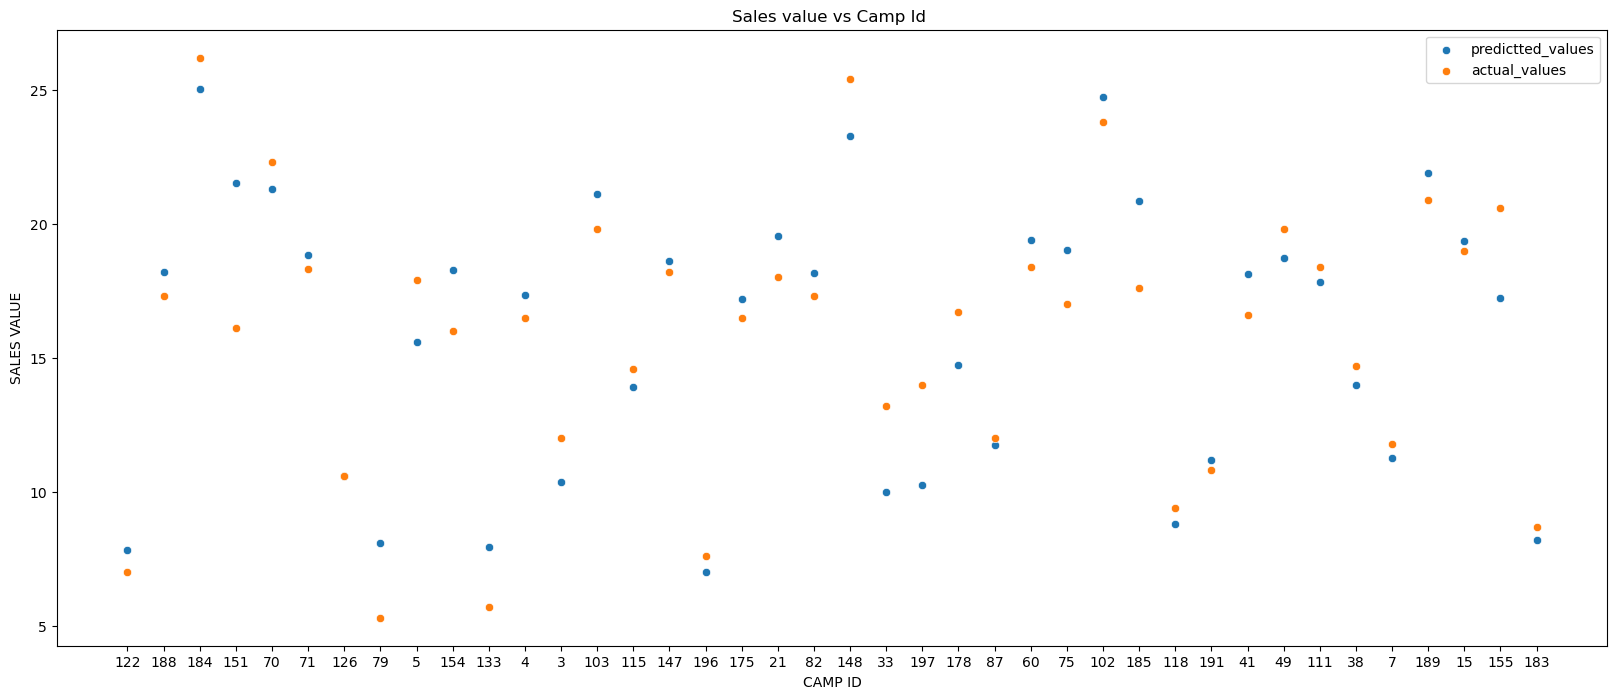

In [38]:
model = LinearRegression().fit(X_train,y_train)
plt.figure(figsize=(20,8))
plt.title('Sales value vs Camp Id ')
sns.scatterplot(x=X_test.index.map(lambda x: x[4:]),y=model.predict(X_test))
sns.scatterplot(x=X_test.index.map(lambda x: x[4:]),y=y_test)
plt.xlabel('CAMP ID')
plt.ylabel('SALES VALUE')
plt.legend(labels=['predictted_values','actual_values'])
plt.show()

**From the above graph we can see that there is not much difference between predicted and actual sales values for differnet Camp ID's**

# **Q5**

In [25]:
to_predict = {'TV':200,'Radio':40,'Newspaper':50}
model.predict(pd.DataFrame(to_predict,index=[0]))[0]


19.89203013194231


**The predictted sales value for the following expenditure data**
<br>
**'TV': 200, 'Radio': 40, 'Newspaper': 50**
<br>
**is: 19.89203013194231**

# **Q6**

###  Normalizing the data

In [26]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
n_X_train = pd.DataFrame(normalizer.fit_transform(X_train))
n_X_test = pd.DataFrame(normalizer.transform(X_test))
n_X_train.columns = X_train.columns
n_X_test.columns = X_test.columns

### Predicting

In [28]:
n_model = LinearRegression().fit(n_X_train,y_train)

from sklearn.metrics import mean_absolute_error
print('without normalizing mean_absolute_error : ',mean_absolute_error(y_test,model.predict(X_test)))
print('after normalizng mean_absolute_error: ',mean_absolute_error(y_test,n_model.predict(n_X_test)))

without normalizing mean_absolute_error :  1.4307532365412863
after normalizng mean_absolute_error:  1.430753236541286


**We can see that there  is no change in performance after and before feature scaling for LinearRegression model**

# **Q7**

In [29]:
bad_model = LinearRegression().fit(X_train[['Newspaper','Radio']],y_train)
print('using all three features mean_absolute_error: ',mean_absolute_error(y_test,model.predict(X_test)))
print('using just Radio, Newspaper mean_absolute_error',mean_absolute_error(y_test,bad_model.predict(X_test[['Newspaper','Radio']])))

using all three features mean_absolute_error:  1.4307532365412863
using just Radio, Newspaper mean_absolute_error 4.466542047434534


**we can see the performance of model has become worse when we use just radio and newspaper mean_absolute_error has increased over 3 times** 

# DATA INSIGHTS

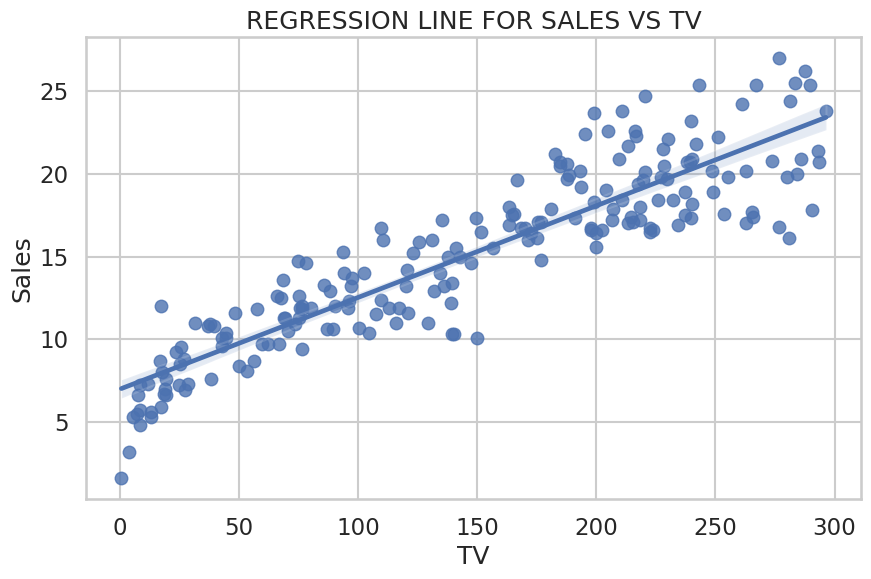

In [17]:
df = ad_sale_data.copy()
# sns.set_theme('talk')
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('REGRESSION LINE FOR SALES VS TV')
sns.regplot(x='TV',y='Sales',data = df)
# plt.xlabel('')
# plt.ylabel('')
# plt.legend()
plt.show()


<AxesSubplot: title={'center': 'REGRESSION LINE FOR SALES VS RADIO'}, xlabel='Radio', ylabel='Sales'>

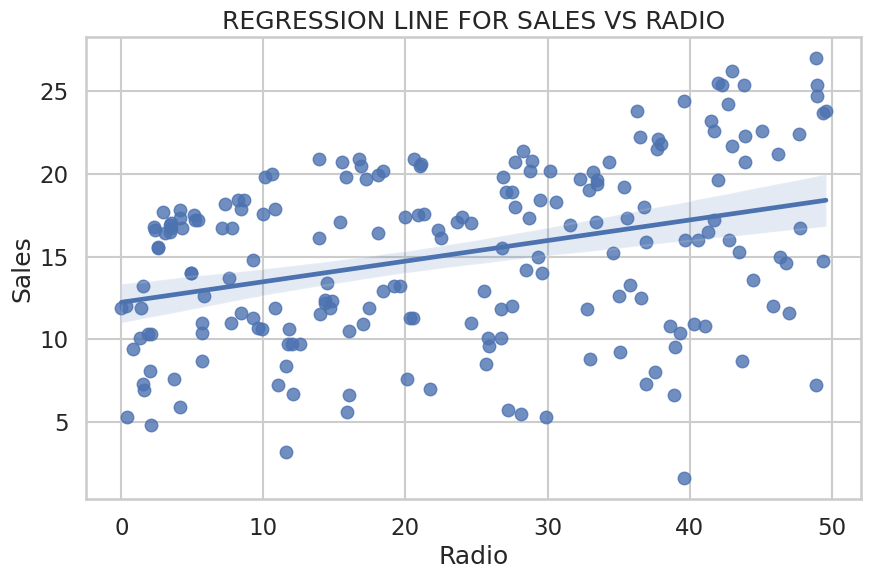

In [18]:
plt.figure(figsize=(10,6))
plt.title('REGRESSION LINE FOR SALES VS RADIO')
sns.regplot(x='Radio',y='Sales',data = df)

<AxesSubplot: title={'center': 'REGRESSION LINE FOR SALES VS NEWSPAPER'}, xlabel='Newspaper', ylabel='Sales'>

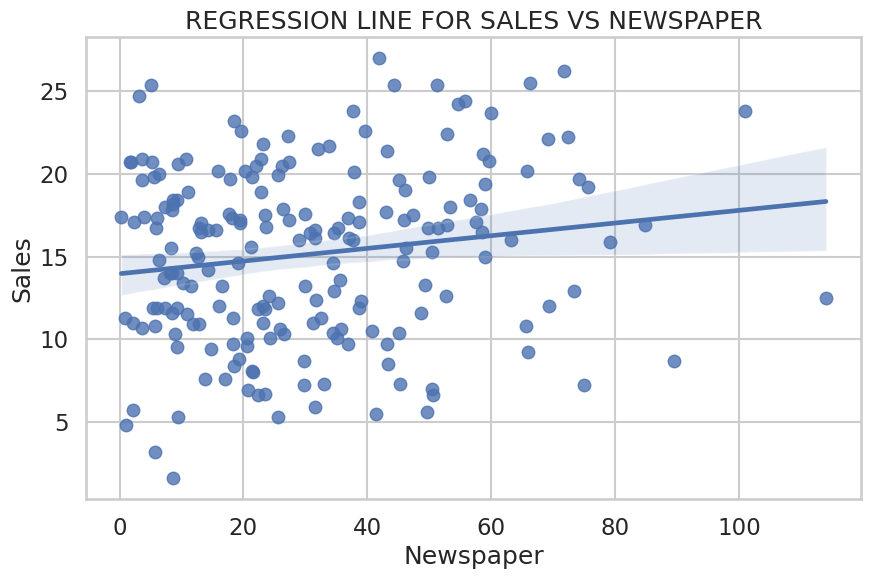

In [19]:
plt.figure(figsize=(10,6))
plt.title('REGRESSION LINE FOR SALES VS NEWSPAPER')
sns.regplot(x='Newspaper',y='Sales',data = df)

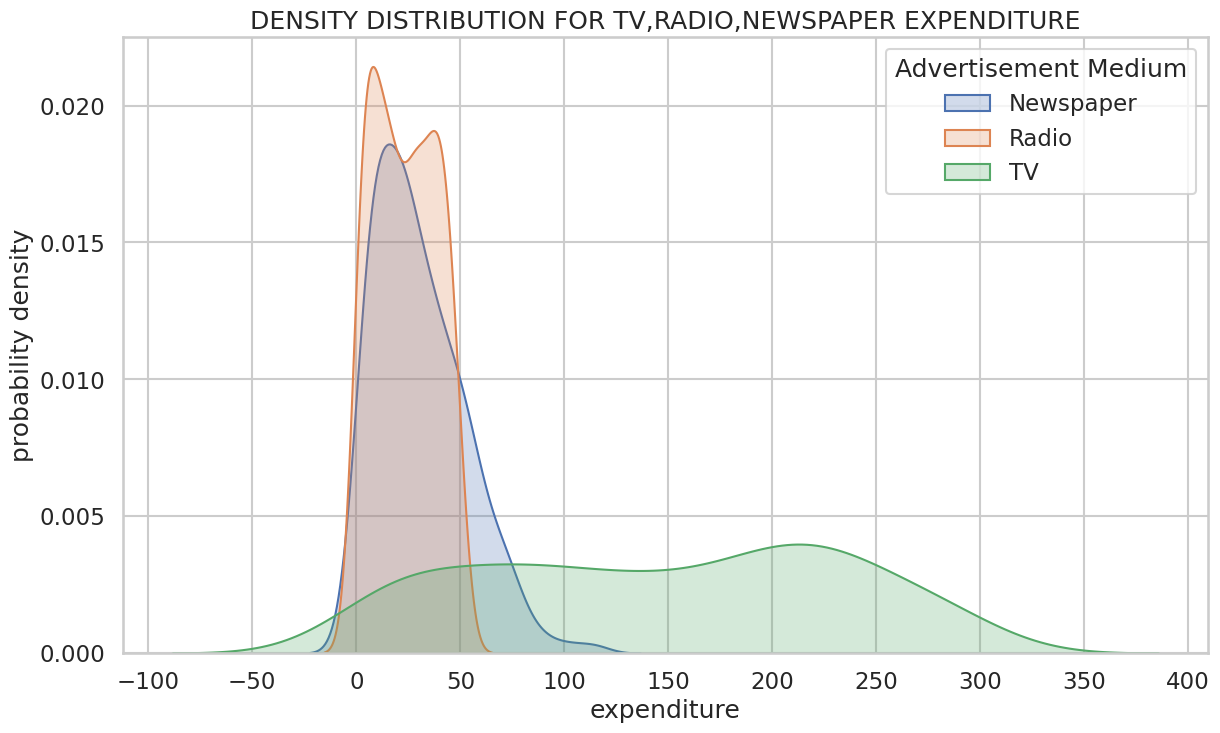

In [28]:
plt.figure(figsize=(14,8))
sns.set_style('whitegrid')
sns.kdeplot(df.Newspaper,fill=True)
sns.kdeplot(df.Radio,fill=True)
sns.kdeplot(df.TV,fill=True)
plt.legend(labels=['Newspaper','Radio','TV'])
plt.xlabel('expenditure')
plt.ylabel('probability density')
plt.title('DENSITY DISTRIBUTION FOR TV,RADIO,NEWSPAPER EXPENDITURE')
plt.legend(title='Advertisement Medium',labels=['Newspaper','Radio','TV'])
plt.xticks(ticks=[i for i in range(-100,450,50)])
plt.show()

([<matplotlib.axis.XTick at 0x797f7d3d2240>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100')])

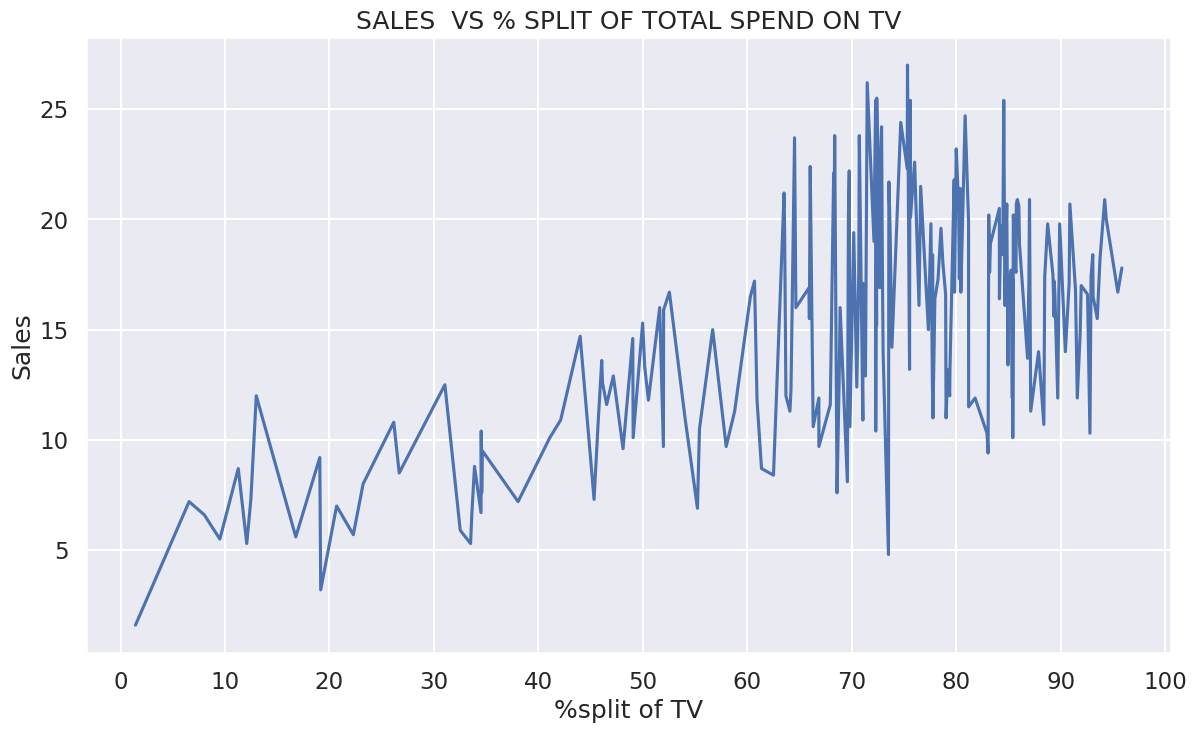

In [36]:
plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
plt.title('SALES  VS % SPLIT OF TOTAL SPEND ON TV')
plt.xlabel('%split of TV')
plt.ylabel('Sales')
sns.lineplot(x=(df.TV/(df.TV +df.Radio +df.Newspaper))*100,y=df.Sales)
plt.xticks(ticks=[i for i in range(0,110,10)])

In [41]:
bin_range = {0:'0-5',1:'5-10',2:'10-15',3:'15-20',4:'20-25',5:'25+'}
df['bin'] = df.Sales.map(lambda x: bin_range[x//5])
bin_order = ['0-5','5-10','10-15','15-20','20-25','25+']

<AxesSubplot: title={'center': 'SALES  VS % SPLIT OF TOTAL SPEND ON RADIO'}, xlabel='%split of radio', ylabel='Sales'>

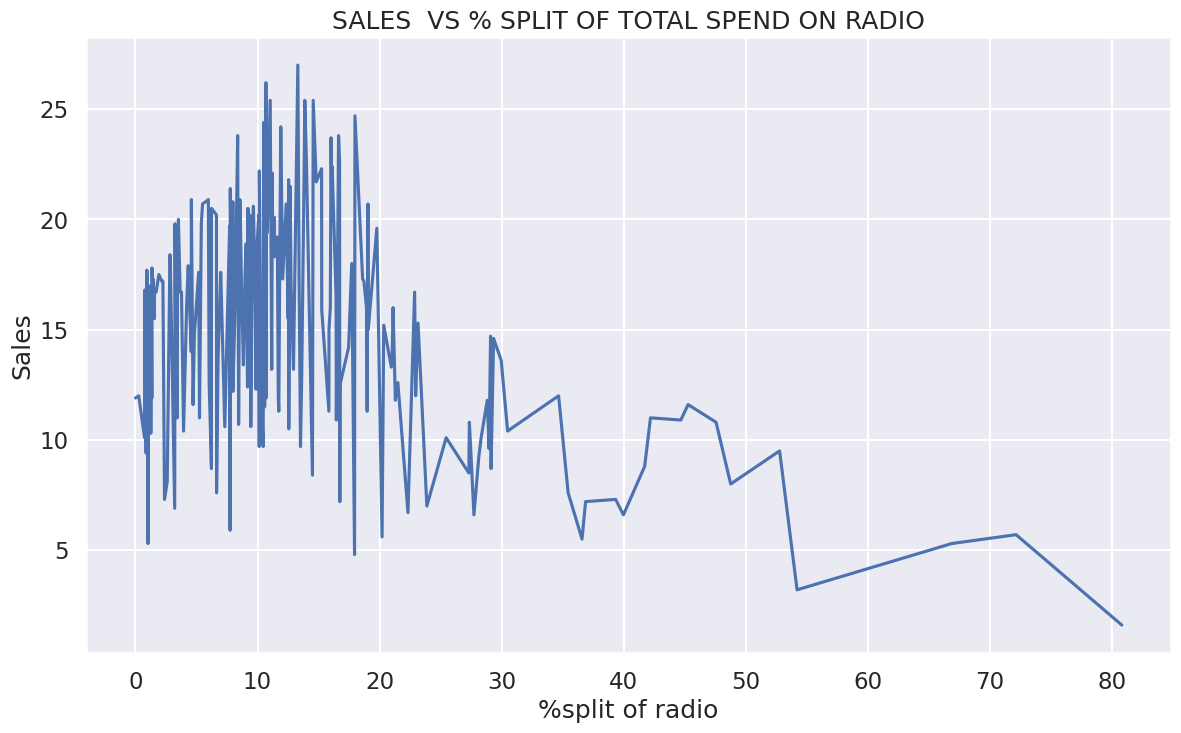

In [37]:
# sns.barplot(y=df.TV,x=df.bin,order =bin_order)
# sns.barplot(y=df.Radio,x=df.bin,order =bin_order)
plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
plt.title('SALES  VS % SPLIT OF TOTAL SPEND ON RADIO')
plt.xlabel('%split of radio')
plt.ylabel('Sales')
sns.lineplot(x=(df.Radio/(df.Newspaper+df.TV+df.Radio))*100,y=df.Sales)


<AxesSubplot: title={'center': 'SALES  VS % SPLIT OF TOTAL SPEND ON NEWSPAPER'}, xlabel='%split of newspaper', ylabel='Sales'>

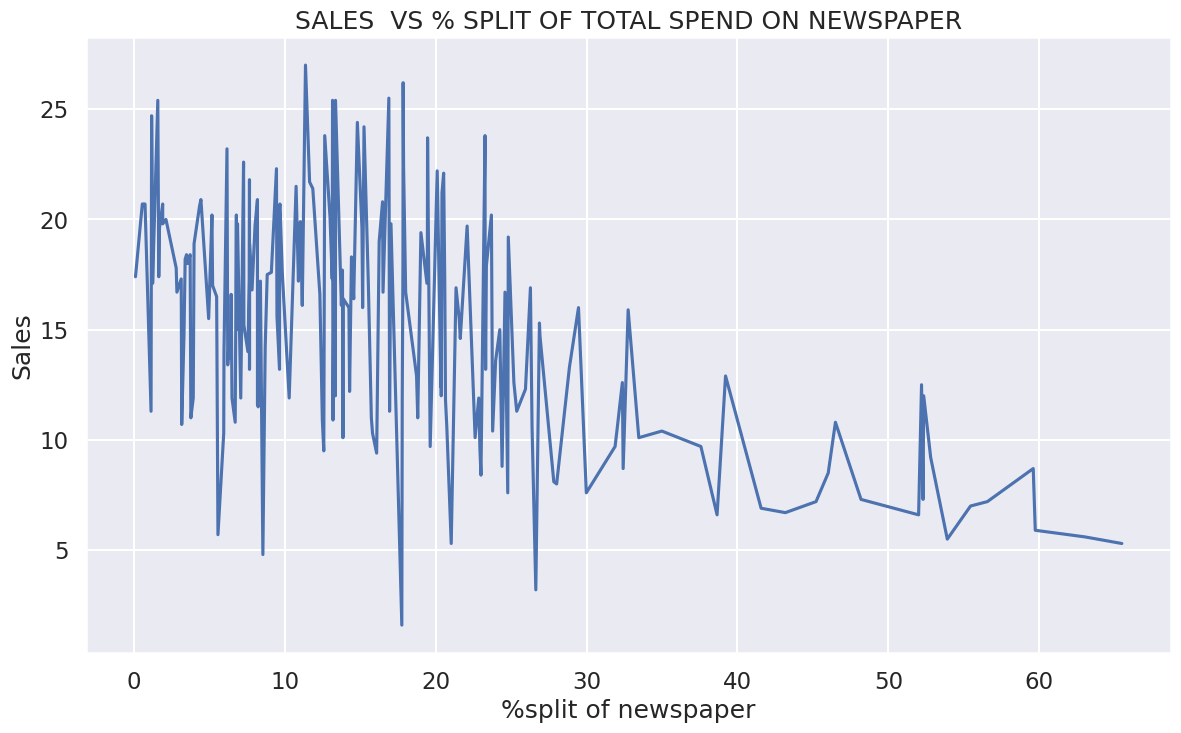

In [38]:
plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
plt.title('SALES  VS % SPLIT OF TOTAL SPEND ON NEWSPAPER')
plt.xlabel('%split of newspaper')
plt.ylabel('Sales')
sns.lineplot(x=(df.Newspaper/(df.Newspaper+df.TV+df.Radio))*100,y=df.Sales)

/tmp/ipykernel_249929/988805956.py:8: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x797f764e5e80> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['Sales >20','Sales >20 regression line ','_','Sales <20','Sales <20 regression line '])


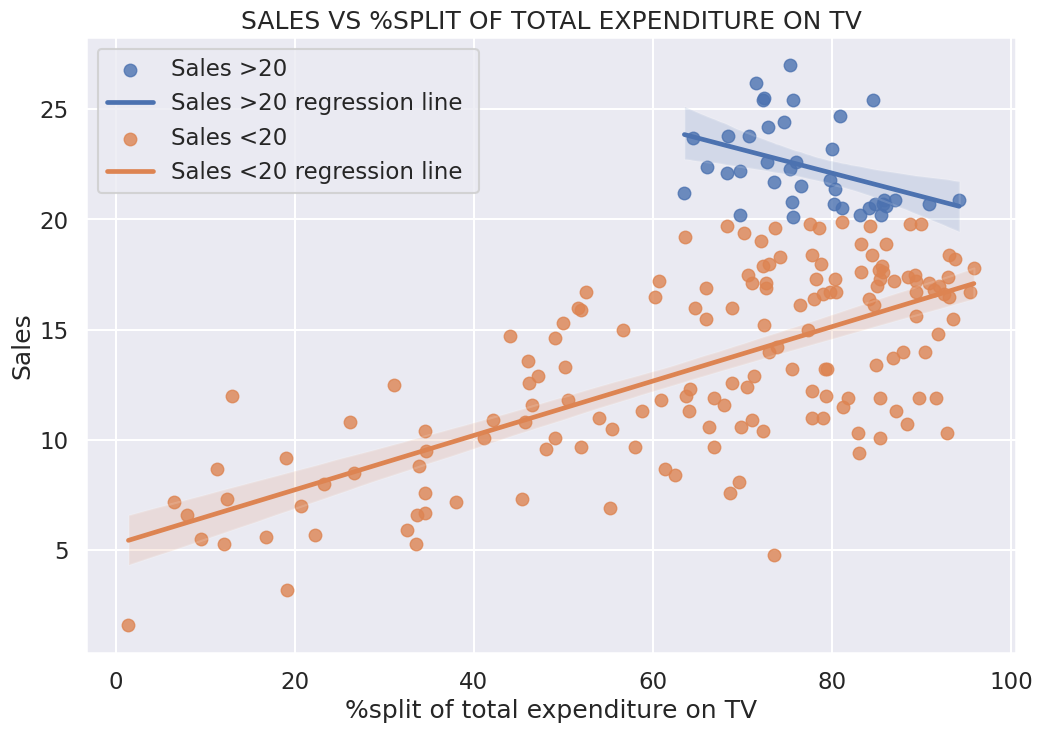

In [58]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt_data = df[df.Sales > 20]
plt.title('SALES VS %SPLIT OF TOTAL EXPENDITURE ON TV')
sns.regplot(y=plt_data.Sales,x=(plt_data.TV/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt_data = df[df.Sales < 20]
sns.regplot(y=plt_data.Sales,x=(plt_data.TV/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt.legend(labels=['Sales >20','Sales >20 regression line ','_','Sales <20','Sales <20 regression line '])
plt.xlabel('%split of total expenditure on TV')
plt.show()

/tmp/ipykernel_249929/1396024280.py:8: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x797f764d5af0> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['%TV > 75','%TV > 75 regression line','_','%TV < 75','%TV < 75 regression line'])


Text(0.5, 0, '%split of total expenditure on TV')

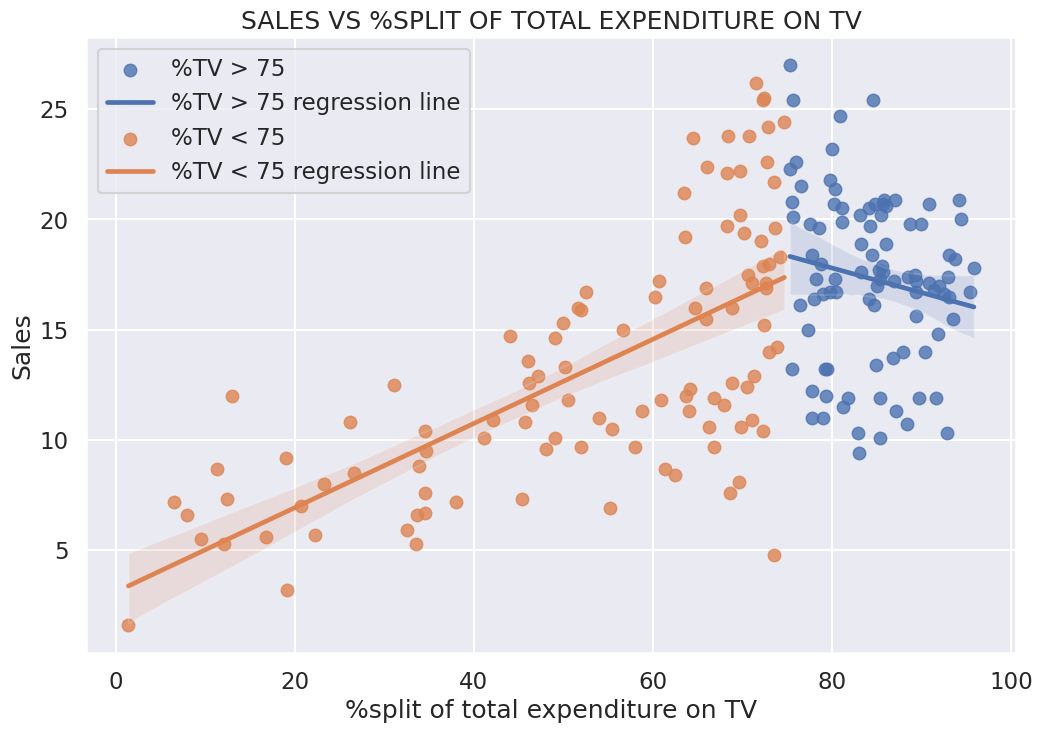

In [57]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.title('SALES VS %SPLIT OF TOTAL EXPENDITURE ON TV')
plt_data = df[(df.TV/(df.TV +df.Radio +df.Newspaper))*100 > 75]
sns.regplot(y=plt_data.Sales,x=(plt_data.TV/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt_data = df[(df.TV/(df.TV +df.Radio +df.Newspaper))*100 < 75]
sns.regplot(y=plt_data.Sales,x=(plt_data.TV/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt.legend(labels=['%TV > 75','%TV > 75 regression line','_','%TV < 75','%TV < 75 regression line'])
plt.xlabel('%split of total expenditure on TV')

/tmp/ipykernel_249929/2850552037.py:8: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x797f7610ffb0> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['%Radio > 15','%Radio > 15 regression line','_','%Radio < 15','%Radio < 15 regression line'])


Text(0.5, 0, '%split of total expenditure on Radio')

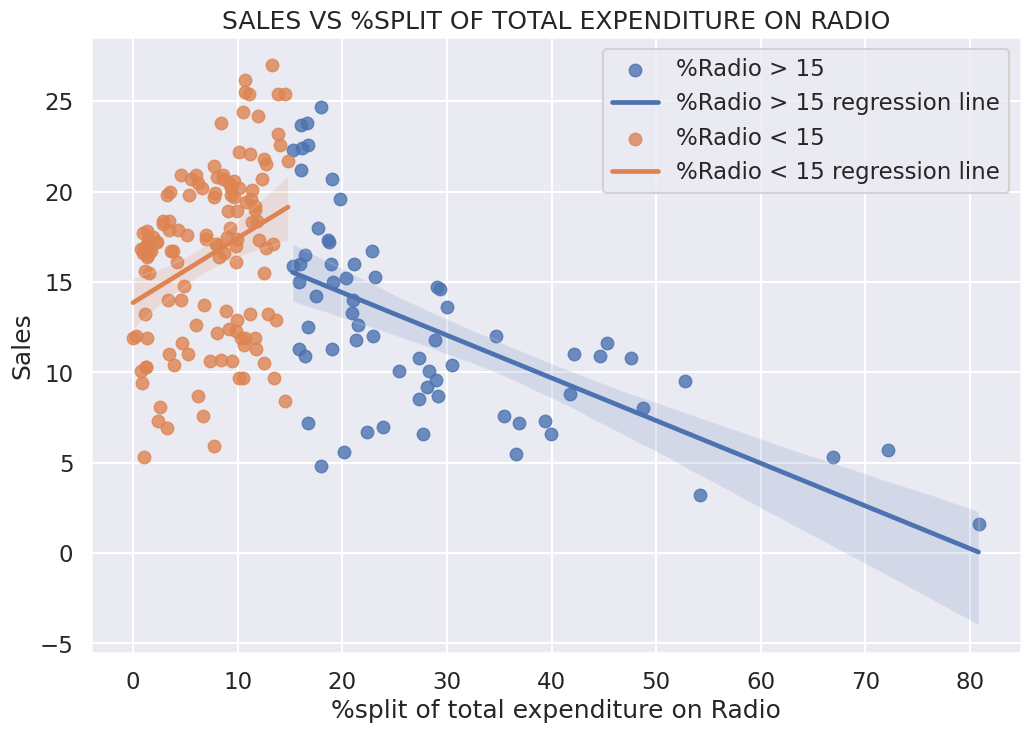

In [61]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.title('SALES VS %SPLIT OF TOTAL EXPENDITURE ON RADIO')
plt_data = df[(df.Radio/(df.TV +df.Radio +df.Newspaper))*100 > 15]
sns.regplot(y=plt_data.Sales,x=(plt_data.Radio/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt_data = df[(df.Radio/(df.TV +df.Radio +df.Newspaper))*100 < 15]
sns.regplot(y=plt_data.Sales,x=(plt_data.Radio/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt.legend(labels=['%Radio > 15','%Radio > 15 regression line','_','%Radio < 15','%Radio < 15 regression line'])
plt.xlabel('%split of total expenditure on Radio')

/tmp/ipykernel_249929/696787071.py:8: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x797f75357920> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['%Newspaper > 15','%Newspaper > 15 regression line','_','%Newspaper < 15','%Newspaper < 15 regression line'])


Text(0.5, 0, '%split of total expenditure on Newspaper')

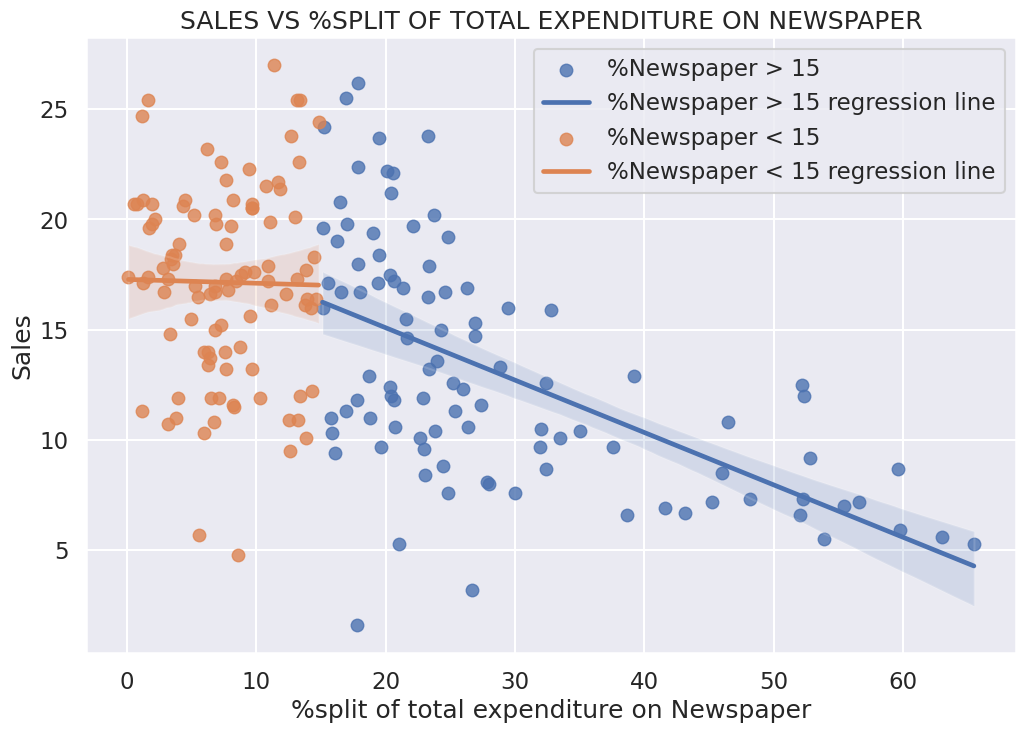

In [62]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.title('SALES VS %SPLIT OF TOTAL EXPENDITURE ON NEWSPAPER')
plt_data = df[(df.Newspaper/(df.TV +df.Radio +df.Newspaper))*100 > 15]
sns.regplot(y=plt_data.Sales,x=(plt_data.Newspaper/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt_data = df[(df.Newspaper/(df.TV +df.Radio +df.Newspaper))*100 < 15]
sns.regplot(y=plt_data.Sales,x=(plt_data.Newspaper/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt.legend(labels=['%Newspaper > 15','%Newspaper > 15 regression line','_','%Newspaper < 15','%Newspaper < 15 regression line'])
plt.xlabel('%split of total expenditure on Newspaper')

/tmp/ipykernel_249929/2068811650.py:7: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x797f753c2e70> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['_','TV regression line','_','_','Newspaper regression line','_','_','Radio regression line'])
/tmp/ipykernel_249929/2068811650.py:7: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x797f751ede80> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['_','TV regression line','_','_','Newspaper regression line','_','_','Radio regression line'])
/tmp/ipykernel_249929/2068811650.py:7: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x797f7501ba10> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['_','TV regression line','_','_','Newspaper regression line','_','_','Radio regression line'])
/tmp/ipykernel_249929/2068811650.py:7: UserWarning: The label '_' of <matplotlib.collect

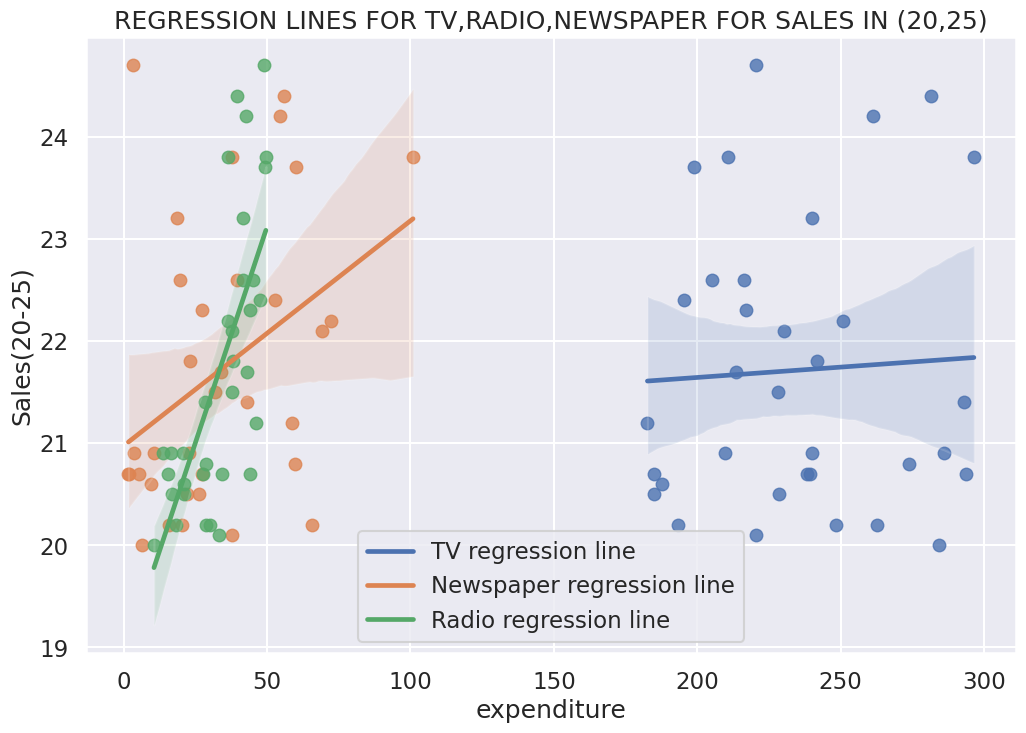

In [68]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
ran = '20-25'
sns.regplot(x='TV',y='Sales',data = df[df.bin == ran])
sns.regplot(x='Newspaper',y='Sales',data = df[df.bin == ran])
sns.regplot(x='Radio',y='Sales',data = df[df.bin == ran])
plt.legend(labels=['_','TV regression line','_','_','Newspaper regression line','_','_','Radio regression line'])
plt.xlabel('expenditure')
plt.ylabel('Sales(20-25)')
plt.title('REGRESSION LINES FOR TV,RADIO,NEWSPAPER FOR SALES IN (20,25)')
plt.show()

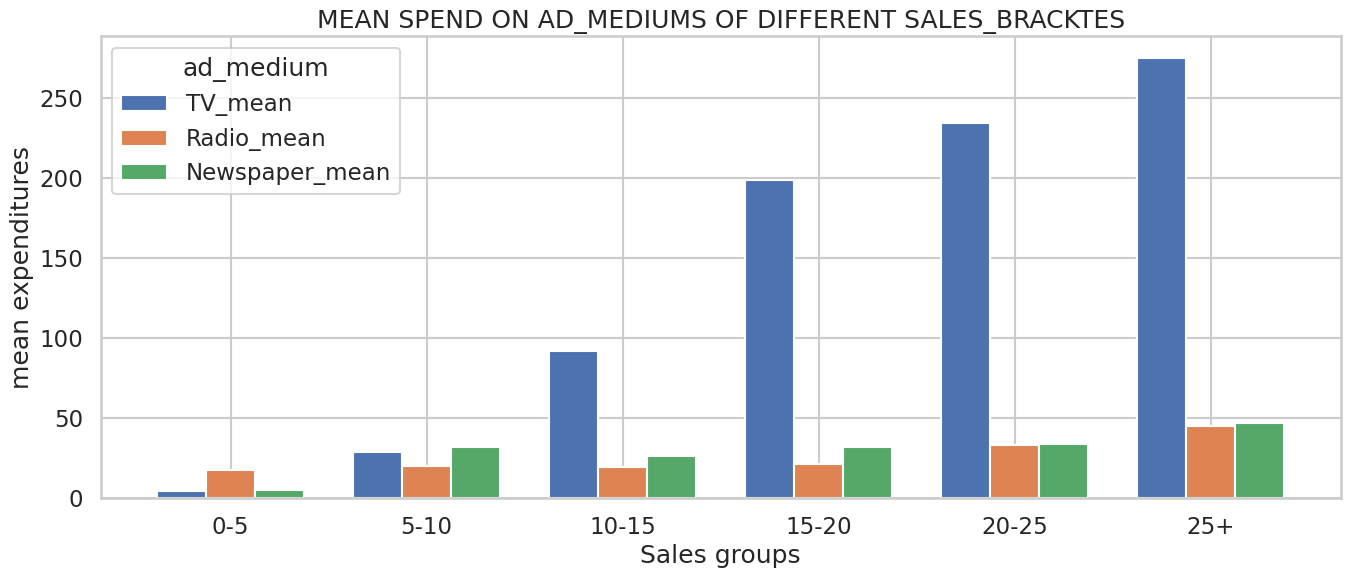

In [51]:
stats = df.groupby('bin').aggregate({
    'TV':['mean','median','sum'],
    'Newspaper':['mean','median','sum'],
    'Radio':['mean','median','sum']
})
stats = stats.reindex(index=bin_order)
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
plt.title('MEAN SPEND ON AD_MEDIUMS OF DIFFERENT SALES_BRACKTES')
positions = list(range(1,7,1))
wid = 0.25
dev = [-wid,0,wid]
plt.bar([i+dev[0] for i in positions],stats['TV']['mean'],width=wid,label='TV_mean')
plt.bar([i+dev[1] for i in positions],stats['Radio']['mean'],width=wid,label='Radio_mean')
plt.bar([i+dev[2] for i in positions],stats['Newspaper']['mean'],width=wid,label='Newspaper_mean')
plt.legend(title='ad_medium')
plt.xticks(positions,bin_order)
plt.xlabel('Sales groups')
plt.ylabel('mean expenditures')
plt.show()